# Importing Data

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
import pickle

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import gensim
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data=pd.read_csv('/content/drive/MyDrive/datasets/airline_sentiment_analysis.csv')

In [3]:
data.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


#EDA

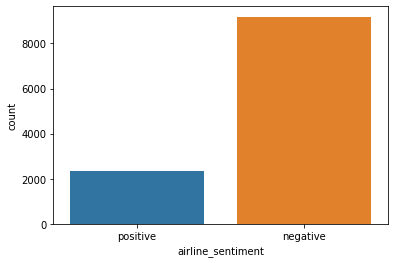

In [4]:
#seeing the number of positives and negatives 
sns.countplot(x='airline_sentiment',data=data)

In [5]:
data.isnull().sum()

Unnamed: 0           0
airline_sentiment    0
text                 0
dtype: int64

No NULL value is present here

In [6]:
#we have a username in our text data so lets drop it I will be using regular expression for this purpose 
#The user name starts with @ and continue till the space 
#making an empty list for appending our values 
text_new=[]
for i in data['text']:
  pos_space=i.find(" ")
  #now slicing up till the end 
  text_new.append(i[pos_space:-1])

In [7]:
#now username has been removed so lets append the results into it 
data['text']=text_new

In [8]:
data.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,plus you've added commercials to the experien...
1,3,negative,"it's really aggressive to blast obnoxious ""en..."
2,4,negative,and it's a really big bad thing about i
3,5,negative,seriously would pay $30 a flight for seats th...
4,6,positive,"yes, nearly every time I fly VX this “ear wor..."


In [9]:
#the Unnamed: 0 column is just a serial number column so dropping it 
data.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
data.head()

,airline_sentiment,text
0,positive,plus you've added commercials to the experien...
1,negative,"it's really aggressive to blast obnoxious ""en..."
2,negative,and it's a really big bad thing about i
3,negative,seriously would pay $30 a flight for seats th...
4,positive,"yes, nearly every time I fly VX this “ear wor..."


In [11]:
#lets encode our sentiment values to 0 and 1 using label_encoder
le=LabelEncoder()
data['airline_sentiment']=le.fit_transform(data['airline_sentiment'])

In [12]:
data.head()

,airline_sentiment,text
0,1,plus you've added commercials to the experien...
1,0,"it's really aggressive to blast obnoxious ""en..."
2,0,and it's a really big bad thing about i
3,0,seriously would pay $30 a flight for seats th...
4,1,"yes, nearly every time I fly VX this “ear wor..."


In [13]:
#lets create a wordcloud for text column for seeing the most occurent words 
text = " ".join(text for text in data.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

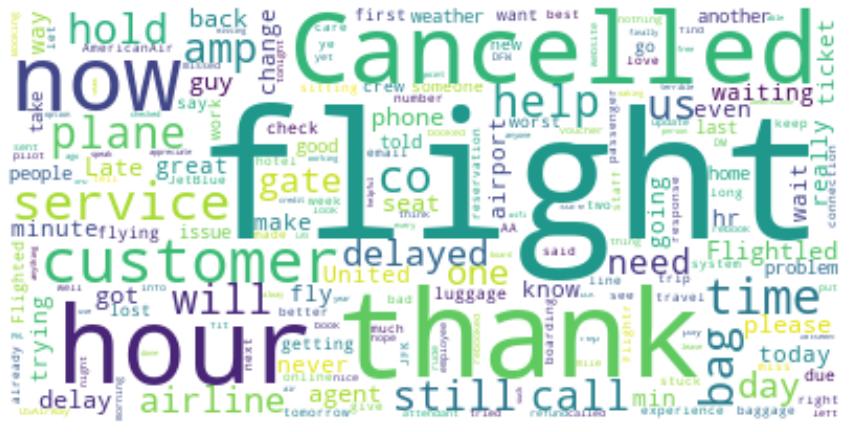

In [14]:
#plotting the word_cloud formed 
plt.figure(figsize=(15,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

# Preprocessing

In [15]:
#first lets remove the punctuations and lowercase all the characters 
def preprocess_text(text):
  #first lowercasing all the letters 
  text=text.lower()
  #striiping our text 
  text = text.strip()
  #reoving any HTML markups 
  text=re.compile('<.*?>').sub('', text) 
  text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
  text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
  text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
  text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
  text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
  text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 

  return text

Now we have to remove the stopwords like a,and which are just for sentence completion but are not for any use for us

In [16]:
#defining the function for stopword deletion
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

Now our step for preprocessing is Stemming for converting our word to root form however its advanced version is lemmaziation which we will be using later

We will not be using it its for reference only

In [17]:
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

As said our next step will be lemmaziation

In [18]:
#we will be using Wordnet for our lemmazition
wl = WordNetLemmatizer()
 
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [19]:
#our final and most important step will be tokenization 
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [20]:
#combining all the above steps in a single function 
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess_text(string)))

In [21]:
data['clean_text'] = data['text'].apply(lambda x: finalpreprocess(x))
data.head()

,airline_sentiment,text,clean_text
0,1,plus you've added commercials to the experien...,plus added commercial experience tacky
1,0,"it's really aggressive to blast obnoxious ""en...",really aggressive blast obnoxious entertainmen...
2,0,and it's a really big bad thing about i,really big bad thing
3,0,seriously would pay $30 a flight for seats th...,seriously would pay flight seat play really ba...
4,1,"yes, nearly every time I fly VX this “ear wor...",yes nearly every time fly vx ear worm wont go ...


In [22]:
#making the tokens of our cleaned data
data['clean_text_tok']=[nltk.word_tokenize(i) for i in data['clean_text']]

# Creating Word2vec model

In [23]:
model = Word2Vec(data['clean_text_tok'],min_count=3)# seeting min_count to 3 for saying that if a number is present less than 3 times in dataset so don't consider it  

In [24]:
w2v = dict(zip(model.wv.index2word, model.wv.vectors))  #combination of word and its vector

In [25]:
#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

# Training and test split

In [26]:
#now lets split our data in train and test split 
X_train, X_test, y_train, y_test = train_test_split(data["clean_text"],
                                                  data["airline_sentiment"],
                                                  test_size=0.2,
                                                  shuffle=True)

In [27]:
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_test_tok= [nltk.word_tokenize(i) for i in X_test]      #for word2vec

In [28]:
#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_test_tok)

In [29]:
print(X_train_vectors_w2v.shape)

(9232, 100)


# TFIDF classifier

## Logistic Regression

In [35]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [40]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1798
           1       0.88      0.69      0.77       511

    accuracy                           0.91      2309
   macro avg       0.90      0.83      0.86      2309
weighted avg       0.91      0.91      0.91      2309

Confusion Matrix: [[1751   47]
 [ 159  352]]
AUC: 0.956468265456944


## Naive Bayes

In [41]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1798
           1       0.99      0.21      0.35       511

    accuracy                           0.83      2309
   macro avg       0.90      0.61      0.62      2309
weighted avg       0.86      0.83      0.78      2309

Confusion Matrix: [[1797    1]
 [ 403  108]]
AUC: 0.9321598906373465


# W2V(LR)

In [42]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1798
           1       0.91      0.27      0.41       511

    accuracy                           0.83      2309
   macro avg       0.87      0.63      0.66      2309
weighted avg       0.85      0.83      0.79      2309

Confusion Matrix: [[1785   13]
 [ 375  136]]
AUC: 0.8609495438506365


Saving the models

In [46]:
pickle.dump(lr_tfidf, open('lr_tfidf.pkl', 'wb'))
pickle.dump(nb_tfidf, open('nb_tfidf.pkl', 'wb'))
pickle.dump(lr_w2v, open('lr_w2v.pkl', 'wb'))